###Loading data

In [14]:
import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns
import datetime, warnings, scipy 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
from collections import OrderedDict
from matplotlib.gridspec import GridSpec
from sklearn import metrics, linear_model
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from scipy.optimize import curve_fit
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"
pd.options.display.max_columns = 50
%matplotlib inline
warnings.filterwarnings("ignore")

In [9]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='KXFccZ54TjsMM8sw3aaUj5p83FhxsyZeEMpQqcRag6Bi',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'flightdelayprediction-donotdelete-pr-9knzn03yvfer05'
object_key = 'flight_features_final.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head()


,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,TAIL_NUM,FL_NUM,ORIGIN,DEST,DEP_TIME,DEP_DEL15,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,DEP_CENT,ARR_CENT,ARR_DELAY,DEP_DELAY
0,1.0,1.0,5.0,470,1399.0,0,4,1907.0,0.0,2102.0,0.0,0.0,0.0,2182.0,1580.25,1003.00,-41.0,2.0
1,1.0,1.0,5.0,718,1476.0,1,3,1344.0,0.0,1439.0,0.0,0.0,0.0,528.0,1103.00,1257.75,4.0,-1.0
2,1.0,1.0,5.0,429,1597.0,0,4,942.0,0.0,1142.0,0.0,0.0,0.0,2182.0,1580.25,1003.00,-33.0,2.0
3,1.0,1.0,5.0,298,1768.0,4,3,820.0,0.0,1345.0,0.0,0.0,0.0,1399.0,1003.00,1257.75,10.0,1.0
4,1.0,1.0,5.0,470,1823.0,4,1,2256.0,0.0,615.0,0.0,0.0,0.0,1927.0,1003.00,1103.00,8.0,-4.0


In [ ]:
df = df_data_2

###Univariate Analysis

Text(0, 0.5, 'Count')

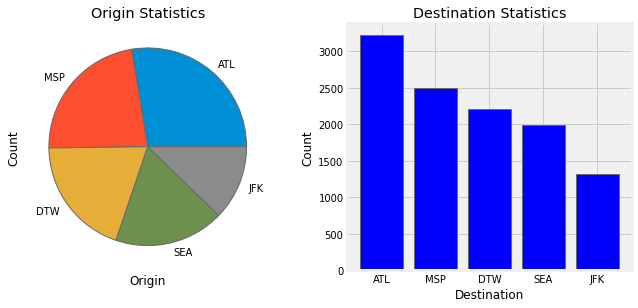

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
counts = df['ORIGIN'].value_counts()
plt.subplot(221)
plt.pie(counts, labels = counts.index)
plt.title('Origin Statistics')
plt.xlabel('Origin')
plt.ylabel('Count')

plt.subplot(222)
counts=df['DEST'].value_counts()
values=df['DEST'].value_counts().index.tolist()
plt.bar(values,counts, color='blue')
plt.title('Destination Statistics')
plt.xlabel('Destination')
plt.ylabel('Count')

###Bivariate Analysis

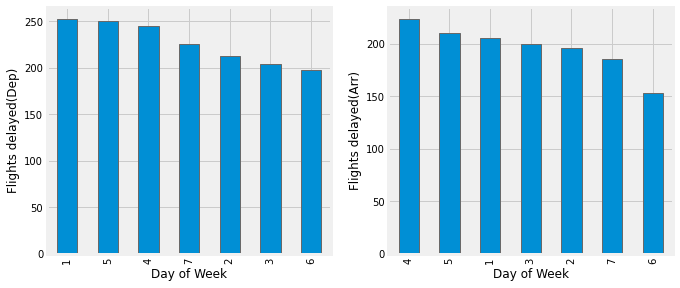

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(221)
delay = df.loc[df['DEP_DEL15'] == 1, ['DAY_OF_WEEK']]
delay['DAY_OF_WEEK'].value_counts().plot(kind='bar', xlabel='Day of Week', ylabel='Flights delayed(Dep)')

plt.subplot(222)
delay = df.loc[df['ARR_DEL15'] == 1, ['DAY_OF_WEEK']]
delay['DAY_OF_WEEK'].value_counts().plot(kind='bar', xlabel='Day of Week', ylabel='Flights delayed(Arr)')

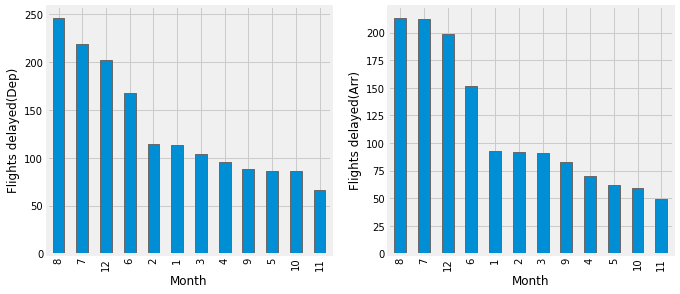

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(221)
delay = df.loc[df['DEP_DEL15'] == 1, ['MONTH']]
delay['MONTH'].value_counts().plot(kind='bar', xlabel='Month', ylabel='Flights delayed(Dep)')

plt.subplot(222)
delay = df.loc[df['ARR_DEL15'] == 1, ['MONTH']]
delay['MONTH'].value_counts().plot(kind='bar', xlabel='Month', ylabel='Flights delayed(Arr)')

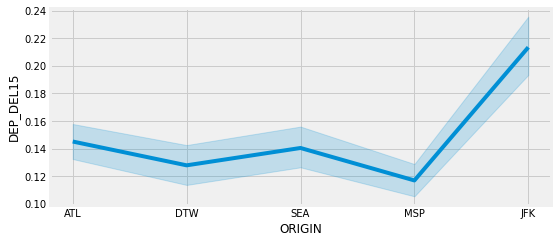

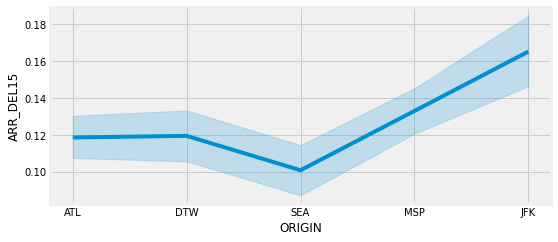

In [ ]:
plt.figure(figsize=(8,8))

#Categorical vs Continuous
plt.subplot(2,1,1)
sns.lineplot(data = df, x = 'ORIGIN', y =  'DEP_DEL15')

plt.figure(figsize=(8,8))
#Continuous vs Continuous
plt.subplot(2,1,1)
sns.lineplot(data = df, x = 'ORIGIN', y =  'ARR_DEL15')

Text(0, 0.5, 'Flights delayed')

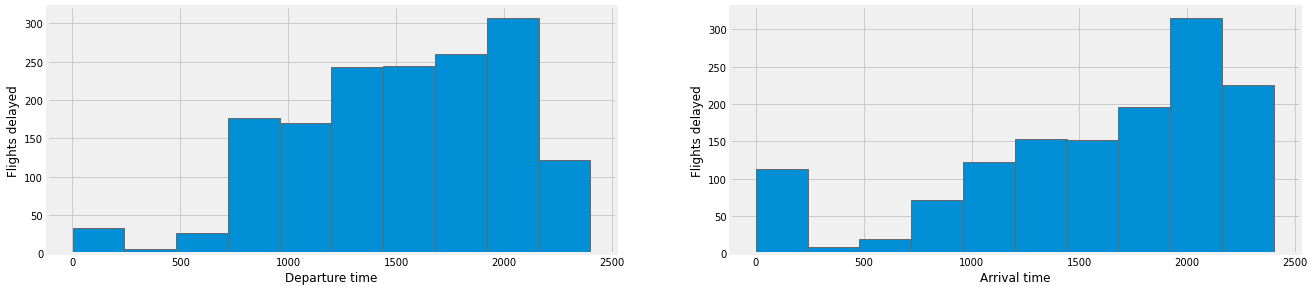

In [ ]:
delay = df.loc[df['DEP_DEL15'] == 1, ['DEP_TIME']]
plt.figure(figsize=(20,10))
plt.subplot(221)
plt.hist(delay['DEP_TIME'])
plt.xlabel('Departure time')
plt.ylabel('Flights delayed')

delay = df.loc[df['ARR_DEL15'] == 1, ['ARR_TIME']]
plt.subplot(222)
plt.hist(delay['ARR_TIME'])
plt.xlabel('Arrival time')
plt.ylabel('Flights delayed')

###Multivariate Analysis

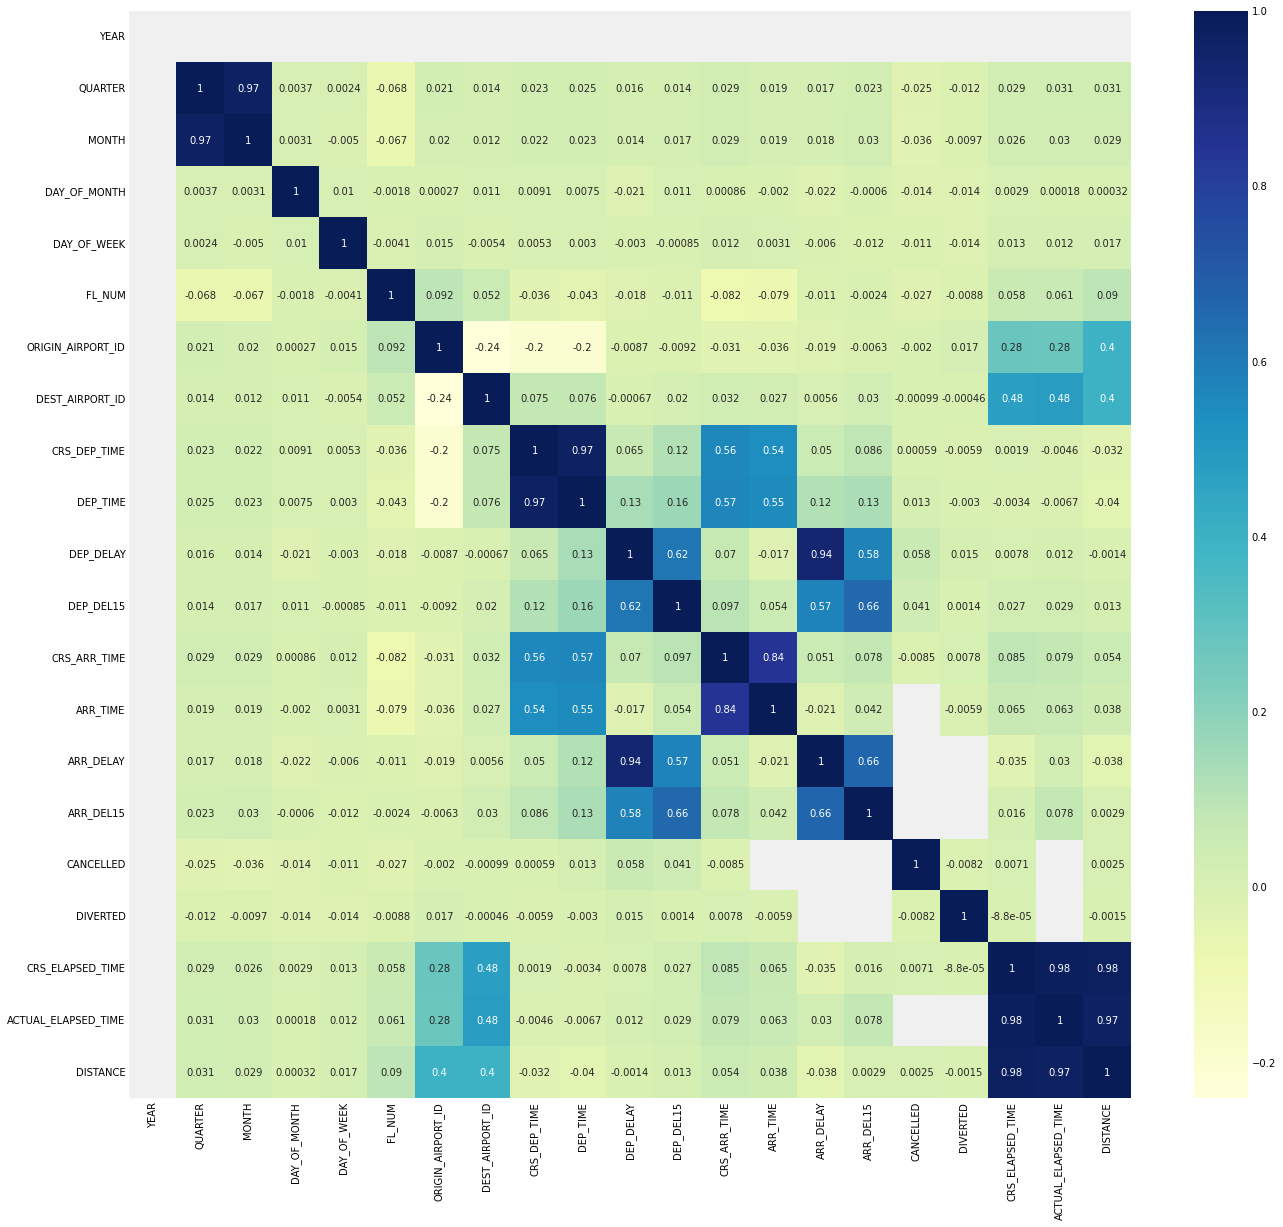

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True)

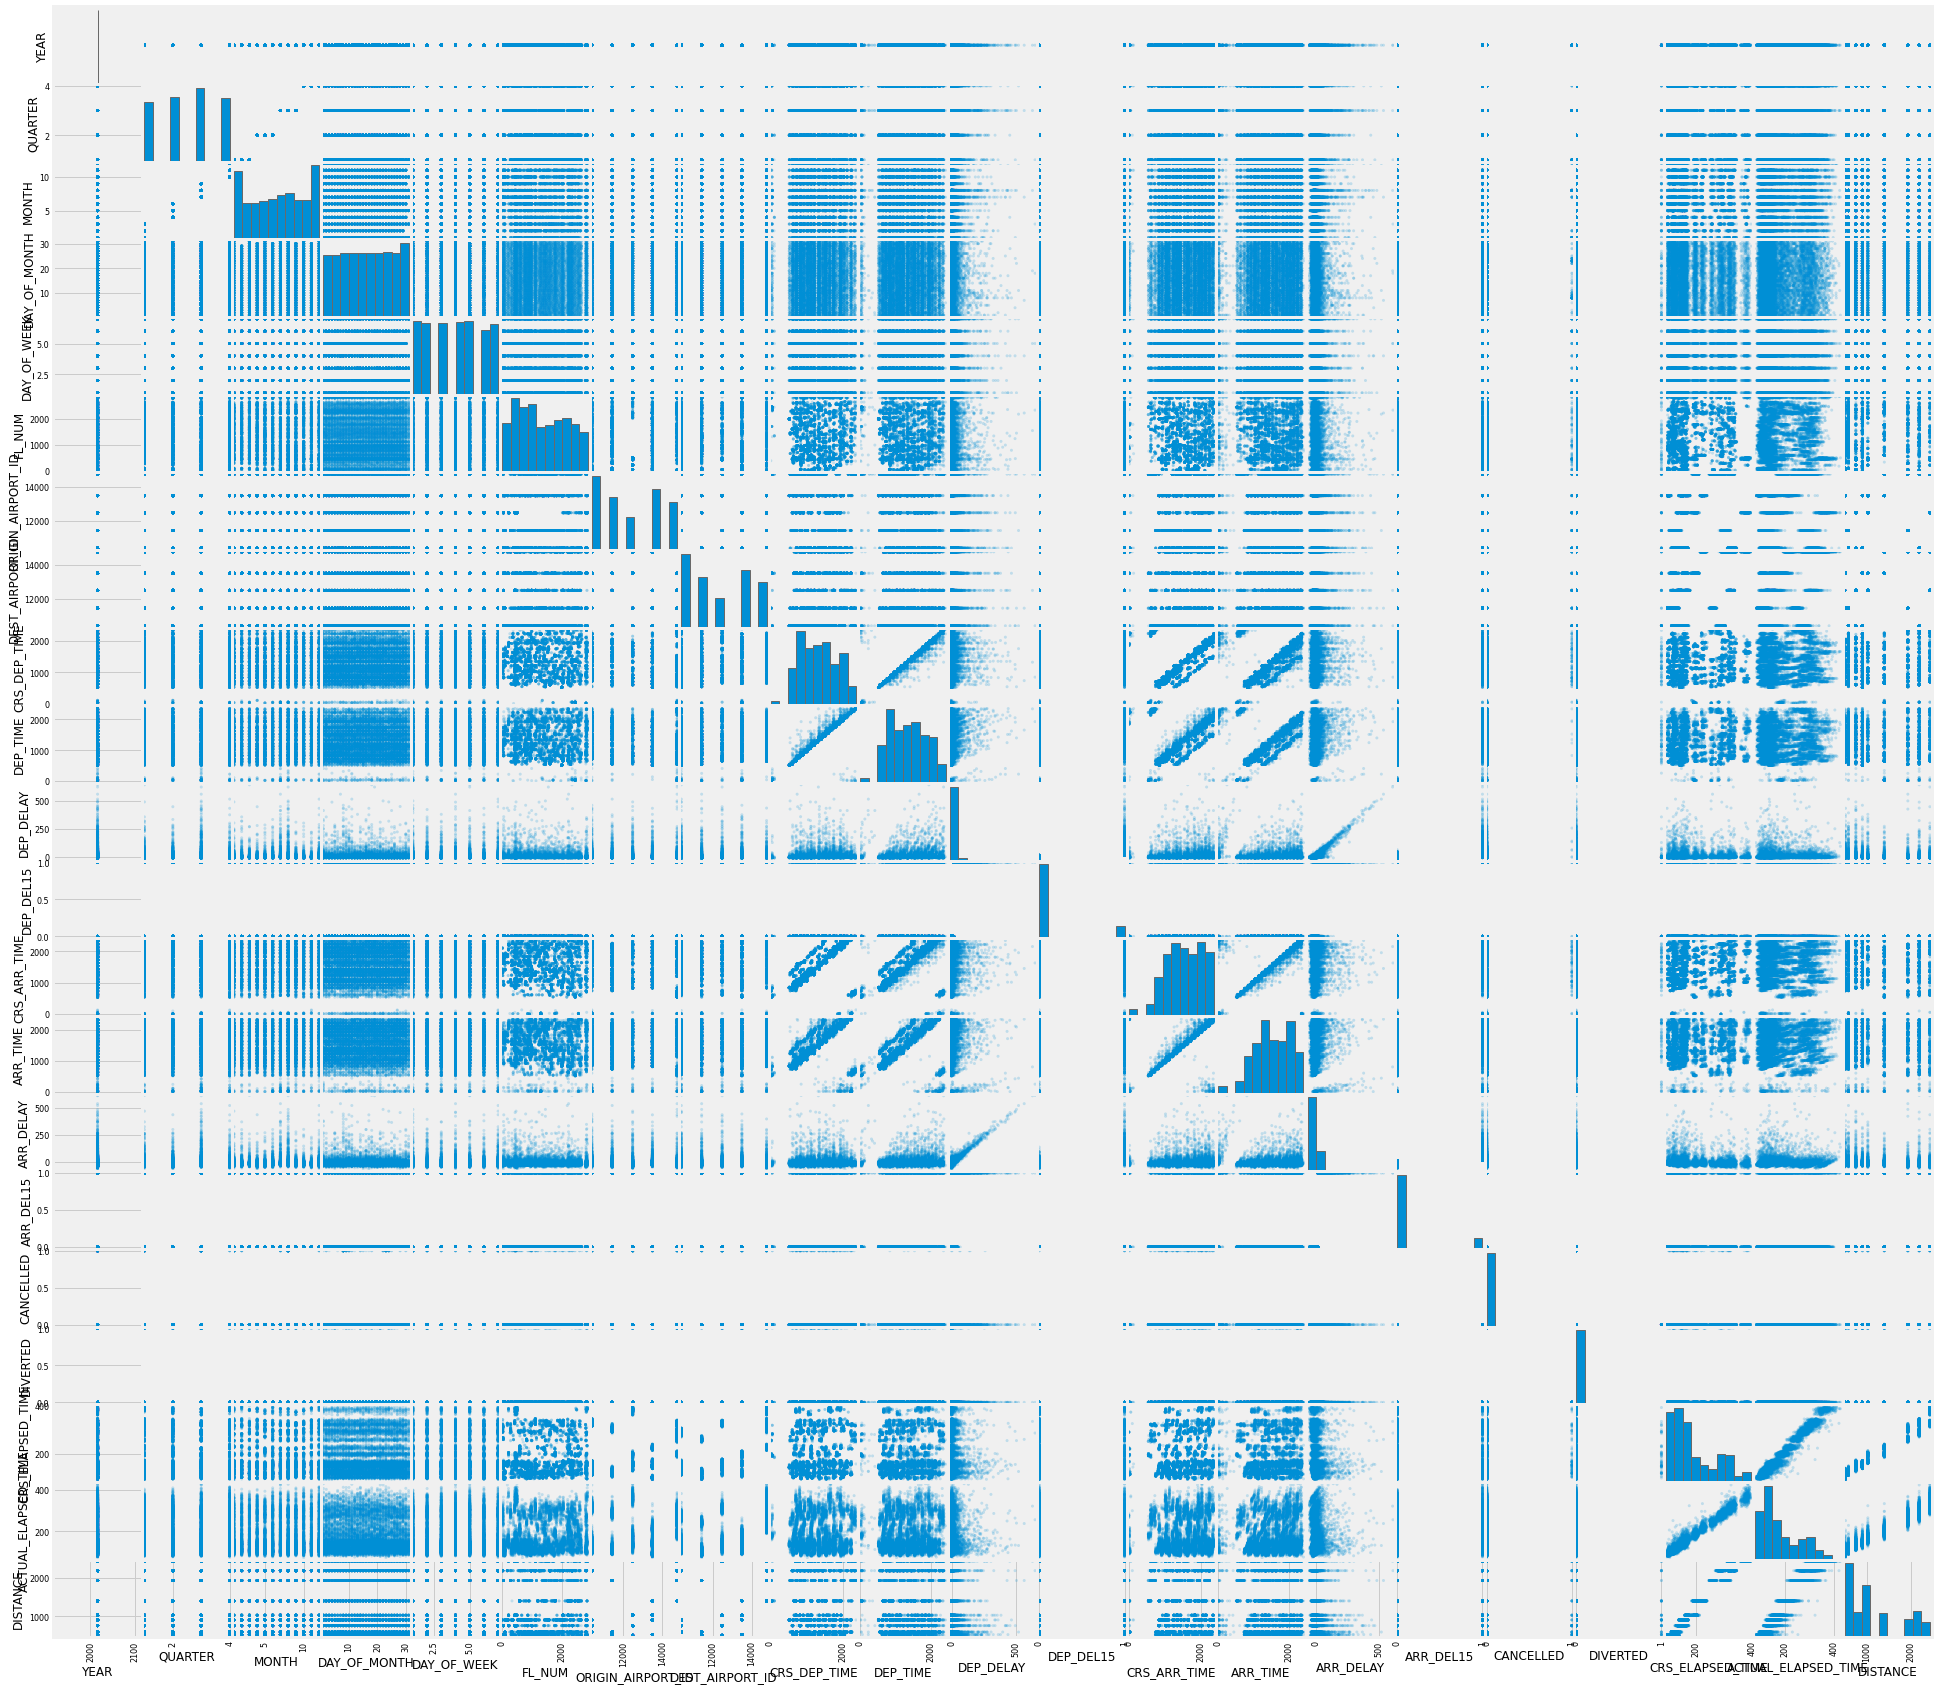

In [ ]:
a = pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(30,30))

In [ ]:
df.describe()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DEL15,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE
count,11231.0,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11124.000000,11124.000000,11124.000000,11231.000000,11116.000000,11043.000000,11043.000000,11231.000000,11231.000000,11231.000000,11043.000000,11231.000000
mean,2016.0,2.544475,6.628973,15.790758,3.960199,1334.325617,12334.516695,12302.274508,1320.798326,1327.189410,8.460266,0.142844,1537.312795,1523.978499,-2.573123,0.124513,0.010150,0.006589,190.652124,179.661233,1161.031965
std,0.0,1.090701,3.354678,8.782056,1.995257,811.875227,1595.026510,1601.988550,490.737845,500.306462,36.762969,0.349930,502.512494,512.536041,39.232521,0.330181,0.100241,0.080908,78.386317,77.940399,643.683379
min,2016.0,1.000000,1.000000,1.000000,1.000000,7.000000,10397.000000,10397.000000,10.000000,1.000000,-16.000000,0.000000,2.000000,1.000000,-67.000000,0.000000,0.000000,0.000000,93.000000,75.000000,509.000000
25%,2016.0,2.000000,4.000000,8.000000,2.000000,624.000000,10397.000000,10397.000000,905.000000,905.000000,-3.000000,0.000000,1130.000000,1135.000000,-19.000000,0.000000,0.000000,0.000000,127.000000,117.000000,594.000000
50%,2016.0,3.000000,7.000000,16.000000,4.000000,1267.000000,12478.000000,12478.000000,1320.000000,1324.000000,-1.000000,0.000000,1559.000000,1547.000000,-10.000000,0.000000,0.000000,0.000000,159.000000,149.000000,907.000000
75%,2016.0,3.000000,9.000000,23.000000,6.000000,2032.000000,13487.000000,13487.000000,1735.000000,1739.000000,4.000000,0.000000,1952.000000,1945.000000,1.000000,0.000000,0.000000,0.000000,255.000000,236.000000,1927.000000
max,2016.0,4.000000,12.000000,31.000000,7.000000,2853.000000,14747.000000,14747.000000,2359.000000,2400.000000,645.000000,1.000000,2359.000000,2400.000000,615.000000,1.000000,1.000000,1.000000,397.000000,428.000000,2422.000000


###Handling Missing Values

In [ ]:
df.isnull().sum()    

YEAR                     0
QUARTER                  0
MONTH                    0
DAY_OF_MONTH             0
DAY_OF_WEEK              0
UNIQUE_CARRIER           0
TAIL_NUM                 0
FL_NUM                   0
ORIGIN_AIRPORT_ID        0
ORIGIN                   0
DEST_AIRPORT_ID          0
DEST                     0
CRS_DEP_TIME             0
DEP_TIME               107
DEP_DELAY              107
DEP_DEL15              107
CRS_ARR_TIME             0
ARR_TIME               115
ARR_DELAY              188
ARR_DEL15              188
CANCELLED                0
DIVERTED                 0
CRS_ELAPSED_TIME         0
ACTUAL_ELAPSED_TIME    188
DISTANCE                 0
dtype: int64

In [ ]:
#For Continuous variables 								
df['DEP_TIME'].fillna(df['DEP_TIME'].mean(), inplace=True)
df['DEP_DELAY'].fillna(df['DEP_DELAY'].mean(), inplace=True)
df['DEP_DEL15'].fillna(df['DEP_DEL15'].median(), inplace=True)
df['ARR_TIME'].fillna(df['ARR_TIME'].mean(), inplace=True)
df['ARR_DELAY'].fillna(df['ARR_DELAY'].mean(), inplace=True)
df['ARR_DEL15'].fillna(df['ARR_DEL15'].median(), inplace=True)
df['ACTUAL_ELAPSED_TIME'].fillna(df['ACTUAL_ELAPSED_TIME'].median(), inplace=True)

In [ ]:
#Ensuring again
print(df.isnull().sum())  

print('\n\ARR_DEL15 : ', df['ARR_DEL15'].unique())

YEAR                   0
QUARTER                0
MONTH                  0
DAY_OF_MONTH           0
DAY_OF_WEEK            0
UNIQUE_CARRIER         0
TAIL_NUM               0
FL_NUM                 0
ORIGIN_AIRPORT_ID      0
ORIGIN                 0
DEST_AIRPORT_ID        0
DEST                   0
CRS_DEP_TIME           0
DEP_TIME               0
DEP_DELAY              0
DEP_DEL15              0
CRS_ARR_TIME           0
ARR_TIME               0
ARR_DELAY              0
ARR_DEL15              0
CANCELLED              0
DIVERTED               0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
DISTANCE               0
dtype: int64

\ARR_DEL15 :  [0. 1.]


###Removing Outliers

In [ ]:
columns = ['QUARTER',  'MONTH','DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_NUM', 'ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID','CRS_DEP_TIME','DEP_TIME','DEP_DELAY','DEP_DEL15','CRS_ARR_TIME','ARR_TIME','ARR_DELAY','ARR_DEL15','CANCELLED','DIVERTED','CRS_ELAPSED_TIME','ACTUAL_ELAPSED_TIME', 'DISTANCE']

for i in columns:
        Q1=df[i].quantile(0.25)
        Q3=df[i].quantile(0.75)
        IQR=Q3-Q1
        upper=Q3+1.5*IQR
        lower=Q1-1.5*IQR
        df[i]=np.where(df[i] >upper, upper, df[i])
        df[i]=np.where(df[i] <lower, lower, df[i])

In [ ]:
#After outlier removal
columns = ['QUARTER',  'MONTH','DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_NUM', 'ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID','CRS_DEP_TIME','DEP_TIME','DEP_DELAY','DEP_DEL15','CRS_ARR_TIME','ARR_TIME','ARR_DELAY','ARR_DEL15','CANCELLED','DIVERTED','CRS_ELAPSED_TIME','ACTUAL_ELAPSED_TIME', 'DISTANCE']


for i in columns:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1
  upper=Q3 + 1.5 * IQR
  lower=Q1 - 1.5 * IQR
  count = np.size(np.where(df[i] >upper))
  count = count + np.size(np.where(df[i] <lower))
  print('No. of outliers in ', i, ' : ', count)

No. of outliers in  QUARTER  :  0
No. of outliers in  MONTH  :  0
No. of outliers in  DAY_OF_MONTH  :  0
No. of outliers in  DAY_OF_WEEK  :  0
No. of outliers in  FL_NUM  :  0
No. of outliers in  ORIGIN_AIRPORT_ID  :  0
No. of outliers in  DEST_AIRPORT_ID  :  0
No. of outliers in  CRS_DEP_TIME  :  0
No. of outliers in  DEP_TIME  :  0
No. of outliers in  DEP_DELAY  :  0
No. of outliers in  DEP_DEL15  :  0
No. of outliers in  CRS_ARR_TIME  :  0
No. of outliers in  ARR_TIME  :  0
No. of outliers in  ARR_DELAY  :  0
No. of outliers in  ARR_DEL15  :  0
No. of outliers in  CANCELLED  :  0
No. of outliers in  DIVERTED  :  0
No. of outliers in  CRS_ELAPSED_TIME  :  0
No. of outliers in  ACTUAL_ELAPSED_TIME  :  0
No. of outliers in  DISTANCE  :  0


###Removing Unnecessary columns

In [ ]:
df = df.drop(['YEAR', 'QUARTER', 'UNIQUE_CARRIER', 'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID', 'CRS_DEP_TIME', 'CRS_ARR_TIME', 'ACTUAL_ELAPSED_TIME', 'CRS_ELAPSED_TIME'], axis=1)

###Spatial Features Addition

In [ ]:
#Finding airports

airports = df['ORIGIN'].unique().tolist()
airports1 = df['DEST'].unique()
for i in airports1:
  airports.append(i)
airports

['ATL', 'DTW', 'SEA', 'MSP', 'JFK', 'SEA', 'MSP', 'DTW', 'ATL', 'JFK']

In [ ]:
#Finding edges

edges = df[['ORIGIN', 'DEST']].values.tolist()

In [ ]:
#Creating the aviation network graph

G = nx.MultiDiGraph()
G.add_nodes_from(airports)
G.add_edges_from(edges)

[0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 3,
 1,
 1,
 2,
 2,
 0,
 2,
 1,
 3,
 1,
 4,
 2,
 2,
 2,
 1,
 3,
 2,
 2,
 3,
 4,
 5,
 1,
 3,
 5,
 3,
 4,
 0,
 5,
 1,
 1,
 4,
 6,
 2,
 2,
 0,
 1,
 1,
 6,
 1,
 3,
 0,
 5,
 3,
 7,
 1,
 2,
 4,
 0,
 8,
 2,
 3,
 4,
 9,
 4,
 4,
 2,
 6,
 7,
 6,
 5,
 7,
 3,
 6,
 10,
 2,
 3,
 3,
 4,
 5,
 4,
 3,
 5,
 4,
 7,
 6,
 5,
 8,
 4,
 11,
 6,
 5,
 7,
 8,
 9,
 8,
 9,
 7,
 5,
 10,
 3,
 5,
 12,
 6,
 10,
 11,
 6,
 9,
 8,
 5,
 10,
 7,
 8,
 13,
 11,
 6,
 12,
 13,
 9,
 14,
 8,
 14,
 12,
 2,
 7,
 10,
 11,
 7,
 1,
 8,
 12,
 1,
 2,
 13,
 15,
 0,
 14,
 15,
 4,
 6,
 16,
 8,
 16,
 17,
 9,
 15,
 3,
 9,
 13,
 18,
 7,
 19,
 17,
 14,
 9,
 6,
 9,
 3,
 7,
 10,
 18,
 19,
 10,
 7,
 15,
 20,
 16,
 1,
 10,
 3,
 11,
 11,
 8,
 9,
 4,
 12,
 11,
 20,
 10,
 21,
 12,
 10,
 5,
 6,
 16,
 21,
 17,
 18,
 12,
 4,
 8,
 13,
 8,
 17,
 13,
 11,
 14,
 4,
 9,
 18,
 5,
 14,
 11,
 15,
 6,
 22,
 19,
 10,
 23,
 20,
 13,
 19,
 12,
 5,
 5,
 21,
 24,
 16,
 7,
 11,
 11,
 6,
 2

In [ ]:
#Calculating crowdedness with degree centrality

b=nx.degree_centrality(G)
print(b)

{'ATL': 1580.25, 'DTW': 1103.0, 'SEA': 1003.0, 'MSP': 1257.75, 'JFK': 671.5}


In [ ]:
#Adding the features to the dataset

dep = []
arr = []
for index, row in df.iterrows():
  dep.append(b[row['ORIGIN']])
  arr.append(b[row['DEST']])

In [ ]:
df['DEP_CENT'] = dep
df['ARR_CENT'] = arr

In [ ]:
#Transformed dataset

df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,TAIL_NUM,FL_NUM,ORIGIN,DEST,DEP_TIME,DEP_DELAY,DEP_DEL15,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,DEP_CENT,ARR_CENT
0,1.0,1.0,5.0,N836DN,1399.0,ATL,SEA,1907.0,2.0,0.0,2102.0,-41.0,0.0,0.0,0.0,2182.0,1580.25,1003.00
1,1.0,1.0,5.0,N964DN,1476.0,DTW,MSP,1344.0,-1.0,0.0,1439.0,4.0,0.0,0.0,0.0,528.0,1103.00,1257.75
2,1.0,1.0,5.0,N813DN,1597.0,ATL,SEA,942.0,2.0,0.0,1142.0,-33.0,0.0,0.0,0.0,2182.0,1580.25,1003.00
3,1.0,1.0,5.0,N587NW,1768.0,SEA,MSP,820.0,1.0,0.0,1345.0,10.0,0.0,0.0,0.0,1399.0,1003.00,1257.75
4,1.0,1.0,5.0,N836DN,1823.0,SEA,DTW,2256.0,-4.0,0.0,615.0,8.0,0.0,0.0,0.0,1927.0,1003.00,1103.00


###Label Encoding

In [ ]:
df['TAIL_NUM'] = df['TAIL_NUM'].astype('category')
df['TAIL_NUM'] = df['TAIL_NUM'].cat.codes
df['ORIGIN'] = df['ORIGIN'].astype('category')
df['ORIGIN'] = df['ORIGIN'].cat.codes
df['DEST'] = df['DEST'].astype('category')
df['DEST'] = df['DEST'].cat.codes
df['DEST'].dtype

dtype('int8')

In [ ]:
df.dtypes

MONTH           float64
DAY_OF_MONTH    float64
DAY_OF_WEEK     float64
TAIL_NUM          int16
FL_NUM          float64
ORIGIN             int8
DEST               int8
DEP_TIME        float64
DEP_DELAY       float64
DEP_DEL15       float64
ARR_TIME        float64
ARR_DELAY       float64
ARR_DEL15       float64
CANCELLED       float64
DIVERTED        float64
DISTANCE        float64
DEP_CENT        float64
ARR_CENT        float64
dtype: object

In [ ]:
#Changing target column(Exited) as the last column

Exit = df['ARR_DELAY']
df = df.drop('ARR_DELAY', axis=1)
df = df.join(Exit)

Exit = df['DEP_DELAY']
df = df.drop('DEP_DELAY', axis=1)
df = df.join(Exit)

###Scaling

In [4]:
X = df.iloc[:, :]

In [5]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()

print('Before scaling : \n', X[1:3])
X = scaler.fit_transform(X)
print('\n\nAfter scaling : \n', X[1:3])

Before scaling : 
    MONTH  DAY_OF_MONTH  DAY_OF_WEEK  TAIL_NUM  FL_NUM  ORIGIN  DEST  DEP_TIME  \
1    1.0           1.0          5.0       718  1476.0       1     3    1344.0   
2    1.0           1.0          5.0       429  1597.0       0     4     942.0   

   DEP_DEL15  ARR_TIME  ARR_DEL15  CANCELLED  DIVERTED  DISTANCE  DEP_CENT  \
1        0.0    1439.0        0.0        0.0       0.0     528.0   1103.00   
2        0.0    1142.0        0.0        0.0       0.0    2182.0   1580.25   

   ARR_CENT  ARR_DELAY  DEP_DELAY  
1   1257.75        4.0       -1.0  
2   1003.00      -33.0        2.0  


After scaling : 
 [[-1.2        -1.          0.25        1.3699187   0.1484375  -0.33333333
   0.33333333  0.02022935  0.         -0.12810945  0.          0.
   0.         -0.28432108 -0.26808142  0.          0.7         0.        ]
 [-1.2        -1.          0.25        0.19512195  0.234375   -0.66666667
   0.66666667 -0.46352516  0.         -0.49751244  0.          0.
   0.          0.95

###Final preprocessed dataset

In [1]:
df.to_csv('flight_features_final.csv', header=True, index=False)

NameError: name 'df' is not defined

In [ ]:
df

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,TAIL_NUM,FL_NUM,ORIGIN,DEST,DEP_TIME,DEP_DEL15,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,DEP_CENT,ARR_CENT,ARR_DELAY,DEP_DELAY
0,1.0,1.0,5.0,470,1399.0,0,4,1907.0,0.0,2102.0,0.0,0.0,0.0,2182.0,1580.25,1003.00,-41.0,2.0
1,1.0,1.0,5.0,718,1476.0,1,3,1344.0,0.0,1439.0,0.0,0.0,0.0,528.0,1103.00,1257.75,4.0,-1.0
2,1.0,1.0,5.0,429,1597.0,0,4,942.0,0.0,1142.0,0.0,0.0,0.0,2182.0,1580.25,1003.00,-33.0,2.0
3,1.0,1.0,5.0,298,1768.0,4,3,820.0,0.0,1345.0,0.0,0.0,0.0,1399.0,1003.00,1257.75,10.0,1.0
4,1.0,1.0,5.0,470,1823.0,4,1,2256.0,0.0,615.0,0.0,0.0,0.0,1927.0,1003.00,1103.00,8.0,-4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11226,12.0,30.0,5.0,648,1715.0,1,0,1003.0,0.0,1148.0,0.0,0.0,0.0,594.0,1103.00,1580.25,-35.0,-2.0
11227,12.0,30.0,5.0,470,1770.0,4,3,1559.0,0.0,2100.0,0.0,0.0,0.0,1399.0,1003.00,1257.75,14.0,17.0
11228,12.0,30.0,5.0,294,1823.0,1,4,1959.0,0.0,2154.0,0.0,0.0,0.0,1927.0,1103.00,1003.00,-16.0,0.0
11229,12.0,30.0,5.0,288,1901.0,0,4,1529.0,0.0,1801.0,0.0,0.0,0.0,2182.0,1580.25,1003.00,-5.0,-1.0


In [ ]:
uploaded = files.upload()

Saving flight_features_final.csv to flight_features_final.csv


In [5]:
df = pd.read_csv(r'flight_features_final.csv')
X = df.iloc[:, :]

FileNotFoundError: [Errno 2] No such file or directory: 'flight_features_final.csv'

In [20]:
x = df.drop(['TAIL_NUM', 'ARR_DELAY', 'DEP_DEL15', 'ARR_DEL15'], axis=1).to_numpy()
x

array([[ 1.00000e+00,  1.00000e+00,  5.00000e+00, ...,  1.58025e+03,
         1.00300e+03,  2.00000e+00],
       [ 1.00000e+00,  1.00000e+00,  5.00000e+00, ...,  1.10300e+03,
         1.25775e+03, -1.00000e+00],
       [ 1.00000e+00,  1.00000e+00,  5.00000e+00, ...,  1.58025e+03,
         1.00300e+03,  2.00000e+00],
       ...,
       [ 1.20000e+01,  3.00000e+01,  5.00000e+00, ...,  1.10300e+03,
         1.00300e+03,  0.00000e+00],
       [ 1.20000e+01,  3.00000e+01,  5.00000e+00, ...,  1.58025e+03,
         1.00300e+03, -1.00000e+00],
       [ 1.20000e+01,  3.00000e+01,  5.00000e+00, ...,  1.58025e+03,
         1.10300e+03, -2.00000e+00]])

###Train/test split

In [21]:
X=x
X = X[:, :-1]

Y1 = X[:, -1]
Y2 = X[:, -1]

#Y1 - Departure Delay
#Y2 - Arrival Delay

In [26]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X,Y1,test_size = 0.2)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X,Y2,test_size = 0.2)
print(X1_train.shape, X1_test.shape, Y1_train.shape, Y1_test.shape)
print(X1_train.shape, X1_test.shape, Y1_train.shape, Y1_test.shape)

(8984, 13) (2247, 13) (8984,) (2247,)
(8984, 13) (2247, 13) (8984,) (2247,)


##Model

In [ ]:
from sklearn.linear_model import LinearRegression as log_mod
model = log_mod()
LogisticRegression = model.fit(X1_train, Y1_train)
r_sq = model.score(X1_train, Y1_train)
print(f"Determination coeeficient: {r_sq}")

Determination coeeficient: 1.0


In [ ]:
Y1_pred = model.predict(X1_test)
print('Predicted values : ', Y1_pred[:5])

Predicted values :  [-0.55 -1.7   0.3  -0.25 -0.2 ]


In [ ]:
#Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

r2 = r2_score(Y1_test, Y1_pred)
mean_squared_error = mean_squared_error(Y1_test, Y1_pred)
rmse = (np.sqrt(mean_squared_error))

print('R2 score : ', r2)
print('Mean squared error : ', mean_squared_error)
print('Root Mean squared error : ', rmse)

R2 score :  1.0
Mean squared error :  2.3368472109943497e-30
Root Mean squared error :  1.5286749854021782e-15


In [ ]:
from sklearn.linear_model import LinearRegression as log_mod
model2 = log_mod()
LogisticRegression2 = model2.fit(X2_train, Y2_train)
r_sq2 = model2.score(X2_train, Y2_train)
print(f"Determination coeeficient: {r_sq2}")

Determination coeeficient: 1.0


In [ ]:
Y2_pred = model.predict(X2_test)
print('Predicted values : ', Y2_pred[:5])

Predicted values :  [ 0.37134384  0.15        0.15       -0.2        -1.        ]


In [ ]:
#Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

r22 = r2_score(Y2_test, Y2_pred)
mean_squared_error2 = mean_squared_error(Y2_test, Y2_pred)
rmse2 = (np.sqrt(mean_squared_error2))

print('R2 score : ', r22)
print('Mean squared error : ', mean_squared_error2)
print('Root Mean squared error : ', rmse2)

R2 score :  1.0
Mean squared error :  2.256351530342628e-30
Root Mean squared error :  1.502115684740236e-15


In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
regr = RandomForestRegressor(max_depth=3, random_state=0)
regr.fit(X1_train, Y1_train)
r_sq3 = regr.score(X1_train, Y1_train)
print(f"Determination coeeficient: {r_sq3}")

Determination coeeficient: 0.9995991298504221


In [28]:
Y1_pred = regr.predict(X1_test)
#Testing Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


r22 = r2_score(Y1_test, Y1_pred)
mean_squared_error2 = mean_squared_error(Y1_test, Y1_pred)
rmse2 = (np.sqrt(mean_squared_error2))
mae2  = mean_absolute_error(Y1_test, Y1_pred)

print('Mean absolute error : ', mae2)
print('Mean squared error : ', mean_squared_error2)
print('Root Mean squared error : ', rmse2)
print('R2 score : ', r22)

Mean absolute error :  3.6496010696850854
Mean squared error :  34.65875644397633
Root Mean squared error :  5.887168796966529
R2 score :  0.999586561217278


In [9]:
!pip install ibm_watson_machine_learning

In [14]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url" : "https://us-south.ml.cloud.ibm.com",
    "apikey":"BZUJD8H61gflLqxUO5awiuhNW7LgKLJqlbPdm-hHYGrI"
    
}

client = APIClient(wml_credentials)

In [15]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name'] == space_name)['metadata']['id'])

In [16]:
space_uid = guid_from_space_name(client, 'FlightDelayModel')
print('Space uid = ' + space_uid)

Space uid = 0dc36637-7c0f-46f2-b92a-636a4bdc8ad1


In [17]:
client.set.default_space(space_uid)

'SUCCESS'

In [18]:
client.software_specifications.list(100)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [19]:
software_spec_uid = client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [20]:
model_details = client.repository.store_model(regr, meta_props={
    client.repository.ModelMetaNames.NAME:"FlightDelayModelMeta",
    client.repository.ModelMetaNames.TYPE:"scikit-learn_1.0",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid})
model_id = client.repository.get_model_uid(model_details)

This method is deprecated, please use get_model_id()


model_id

In [24]:
model_id

'f3e9ff9d-e941-4117-818f-8ae73b0910e1'

In [22]:
X1_train

array([[ 7.00000e+00,  2.20000e+01,  5.00000e+00, ...,  1.10300e+03,
         1.25775e+03,  3.10000e+01],
       [ 5.00000e+00,  2.50000e+01,  3.00000e+00, ...,  1.00300e+03,
         1.25775e+03,  1.60000e+01],
       [ 2.00000e+00,  2.70000e+01,  6.00000e+00, ...,  1.00300e+03,
         1.10300e+03, -1.40000e+01],
       ...,
       [ 2.00000e+00,  2.60000e+01,  5.00000e+00, ...,  6.71500e+02,
         1.58025e+03, -1.10000e+01],
       [ 1.00000e+01,  1.20000e+01,  3.00000e+00, ...,  1.00300e+03,
         1.58025e+03, -2.80000e+01],
       [ 7.00000e+00,  1.00000e+00,  5.00000e+00, ...,  1.58025e+03,
         6.71500e+02, -2.10000e+01]])